<h1>PC Prices </h1>

Computers are arguably a basic need nowadays in the age of technology. However, their prices can range from a few hundred to even thousands of dollars depending on the model. For a person looking to purchase a computer, finding one within their budget across this large range can be difficult. Hence, a trained machine learning model that can predict appropriate prices for any computer given its specifications can be extremely useful in narrowing down the range and pointing out possible options, helping people plan for their budget.

# Import Libraries and Data

In [1135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


In [1136]:
df = pd.read_csv("./data/pc_data (regression).csv")

display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15320 entries, 0 to 15319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        15320 non-null  int64  
 1   Brand             15320 non-null  object 
 2   Type              15320 non-null  object 
 3   Screen Size       15320 non-null  float64
 4   Screen Specs      15320 non-null  object 
 5   CPU               15320 non-null  object 
 6   RAM               15320 non-null  object 
 7   Hard Disk         15320 non-null  object 
 8   GPU               15320 non-null  object 
 9   Operating System  15320 non-null  object 
 10  Weight            15320 non-null  object 
 11  Price ($)         15320 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.4+ MB


None

,Product ID,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,GPU,Operating System,Weight,Price ($)
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568.93416
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394.77616
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1531.80000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,6759.76680
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4804.79040


In [1137]:
for col in df:
    uniques = df[col].unique()

    print(f"{col}, number of unique values: {len(uniques)}")
    print(uniques[:9])
    print()

Product ID, number of unique values: 15320
[0 1 2 3 4 5 6 7 8]

Brand, number of unique values: 19
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft']

Type, number of unique values: 6
['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']

Screen Size, number of unique values: 18
[13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5]

Screen Specs, number of unique values: 40
['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080']

CPU, number of unique values: 118
['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz' 'AMD A9-Series 9420 3GHz' 'Intel Core i7 2.2GHz'
 'Intel Core i7 8550U 1.8GHz' 'Intel Core i5 8250U 1.6GHz']

RAM, number of unique values: 9
['8GB' '16GB' '4

The data contains mostly categorical variables which needs a lot of cleaning to convert into somehting a model can use and the numerical variables also containing string units that need to be cleaned. <br>
Thankfully, there seems to be no missing data in the dataset.

# Feature Transformation

In [1139]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

### Brand

In [1310]:
brand = df['Brand'].copy()
brand.value_counts(normalize=False)

Lenovo       3532
Dell         3492
HP           3228
Asus         1844
Acer         1204
MSI           640
Toshiba       576
Apple         200
Samsung       108
Razer          84
Mediacom       84
Microsoft      68
Xiaomi         48
Vero           48
Google         36
Fujitsu        36
LG             36
Chuwi          32
Huawei         24
Name: Brand, dtype: int64

There are 19 unique values and the variable is not ordinal, hence something needs to be done to reduce its dimensions. <br>
Since most of the unique variables occur very rarely in the data, they can be grouped into an 'Other' category without much loss of
information in the data

In [1141]:
cumperc = brand.value_counts(normalize=True).cumsum()
cumperc

Lenovo       0.230548
Dell         0.458486
HP           0.669191
Asus         0.789556
Acer         0.868146
MSI          0.909922
Toshiba      0.947520
Apple        0.960574
Samsung      0.967624
Razer        0.973107
Mediacom     0.978590
Microsoft    0.983029
Xiaomi       0.986162
Vero         0.989295
Google       0.991645
Fujitsu      0.993995
LG           0.996345
Chuwi        0.998433
Huawei       1.000000
Name: Brand, dtype: float64

In [1142]:
threshold = 0.9

below_threshold = []
for name in cumperc.index:
    below_threshold.append(name)
    if cumperc[name] > threshold:
        break

below_threshold

['Lenovo', 'Dell', 'HP', 'Asus', 'Acer', 'MSI']

In [1308]:
brand[~brand.isin(below_threshold)] = 'Other'

In [1309]:
brand.value_counts()

Lenovo    3532
Dell      3492
HP        3228
Asus      1844
Other     1380
Acer      1204
MSI        640
Name: Brand, dtype: int64

### Screen Specs

In [1311]:
screen_specs = df['Screen Specs'].copy()

screen_specs.value_counts(normalize=True)

Full HD 1920x1080                                0.387990
1366x768                                         0.215666
IPS Panel Full HD 1920x1080                      0.178068
IPS Panel Full HD / Touchscreen 1920x1080        0.041253
Full HD / Touchscreen 1920x1080                  0.036292
1600x900                                         0.018016
Touchscreen 1366x768                             0.012533
Quad HD+ / Touchscreen 3200x1800                 0.011749
IPS Panel 4K Ultra HD 3840x2160                  0.009399
IPS Panel 4K Ultra HD / Touchscreen 3840x2160    0.008616
4K Ultra HD / Touchscreen 3840x2160              0.007833
4K Ultra HD 3840x2160                            0.005483
IPS Panel 1366x768                               0.005483
Touchscreen 2560x1440                            0.005483
IPS Panel Quad HD+ / Touchscreen 3200x1800       0.004700
Touchscreen 2256x1504                            0.004439
IPS Panel Retina Display 2304x1440               0.004439
IPS Panel Touc

Screen specs contain the resolution at the end, thus that can be extracted out and used as a feature by itself <br>
The monitor types then have to further cleaned. <hr> 
HD, Quad, HD+ and 4k all refer to resolutions, so they are redundant <br>
retina display and ips panels are the same thing, its just that Apple uses retina Display to refer to ips panels. Hence it is redundant as well <br>
<hr>
This leaves us with two keywords. Touchscreen and IPS panels that describe the variable
<br>
SKlearn's countvectorizer is used to extract these features

In [1312]:
# extract screen resolution
split =  screen_specs.str.split(r"(\d{3,4}x\d{3,4})", expand=True)
screen_resolution = split[1]
screen_resolution.name = 'Resolution'
screen_specs = split[0]

In [1313]:
cvect = CountVectorizer(
    stop_words=[
        "hd",
        "hd+",
        "quad",
        "full",
        "4k",
        "ultra",
        "panel",
        "retina",
        "display",
    ],
    binary=True,
)
sp = cvect.fit_transform(screen_specs)
screen_specs = pd.DataFrame.sparse.from_spmatrix(
    sp, columns=cvect.get_feature_names_out()
).sparse.to_dense()

In [1317]:
screen_resolution.value_counts()

1920x1080    9908
1366x768     3628
3840x2160     516
3200x1800     320
2560x1440     276
1600x900      276
2304x1440      68
2256x1504      68
2560x1600      56
1920x1200      56
2400x1600      48
1440x900       32
2880x1800      32
2160x1440      24
2736x1824      12
Name: Resolution, dtype: int64

In [1316]:
screen_specs.value_counts()

ips  touchscreen
0    0              9748
1    0              3292
0    1              1268
1    1              1012
dtype: int64

### Hard Disk

In [1148]:
hard_disk = df['Hard Disk'].copy()

hard_disk.value_counts()

256GB SSD                        4840
1TB HDD                          2616
500GB HDD                        1560
512GB SSD                        1392
128GB SSD +  1TB HDD             1112
128GB SSD                         892
256GB SSD +  1TB HDD              868
32GB Flash Storage                448
2TB HDD                           188
64GB Flash Storage                168
512GB SSD +  1TB HDD              168
1TB SSD                           168
256GB SSD +  2TB HDD              112
1.0TB Hybrid                      108
256GB Flash Storage                84
16GB Flash Storage                 84
32GB SSD                           68
180GB SSD                          60
128GB Flash Storage                40
512GB SSD +  2TB HDD               36
16GB SSD                           36
512GB Flash Storage                24
1TB SSD +  1TB HDD                 24
256GB SSD +  500GB HDD             24
128GB SSD +  2TB HDD               24
256GB SSD +  256GB SSD             20
512GB SSD + 

Data contains different units of TB and GB, hence it needs to be converted <br>
Some rows contain multiple storage devices, hence that needs to be cleaned in order to ensure consistency <br>
There are four formats, HDD, SSD, Flash and Hybrid. These types can be separated into individual columns <br>
In the end, a representation of Four different columns for each format with the values corresponding to the storage size of that format is chosen

In [1149]:
hard_disk.value_counts(normalize=True)

256GB SSD                        0.315927
1TB HDD                          0.170757
500GB HDD                        0.101828
512GB SSD                        0.090862
128GB SSD +  1TB HDD             0.072585
128GB SSD                        0.058225
256GB SSD +  1TB HDD             0.056658
32GB Flash Storage               0.029243
2TB HDD                          0.012272
64GB Flash Storage               0.010966
512GB SSD +  1TB HDD             0.010966
1TB SSD                          0.010966
256GB SSD +  2TB HDD             0.007311
1.0TB Hybrid                     0.007050
256GB Flash Storage              0.005483
16GB Flash Storage               0.005483
32GB SSD                         0.004439
180GB SSD                        0.003916
128GB Flash Storage              0.002611
512GB SSD +  2TB HDD             0.002350
16GB SSD                         0.002350
512GB Flash Storage              0.001567
1TB SSD +  1TB HDD               0.001567
256GB SSD +  500GB HDD           0

In [1150]:
hard_disk = hard_disk.str.replace(".0", "", regex=False)
hard_disk = hard_disk.str.replace("TB", "000GB", regex=False)
hard_disk = hard_disk.str.replace("Storage", "", regex=False)

dict = {
    "SSD (GB)": [],
    "HDD (GB)": [],
    "Flash (GB)": [],
    "Hybrid (GB)": [],
}
for i, row in enumerate(hard_disk.values):
    if "+" in row:
        split = row.split("+")
    else:
        split = [row]

    for value in split:
        size, format = value.strip().split()
        size = size.replace('GB', '')
        
        dict[f'{format} (GB)'].append(int(size))

    for key in dict:
        if len(dict[key]) < i+1:
            dict[key].append(0)

hard_disk = pd.DataFrame(dict)

In [1151]:
hard_disk.head()

,SSD (GB),HDD (GB),Flash (GB),Hybrid (GB)
0,128,0,0,0
1,0,0,128,0
2,256,0,0,0
3,512,0,0,0
4,256,0,0,0


### CPU

In [1152]:
cpu2 = df['CPU'].copy()

cpu2.value_counts()

Intel Core i5 7200U 2.5GHz     2240
Intel Core i7 7700HQ 2.8GHz    1732
Intel Core i7 7500U 2.7GHz     1604
Intel Core i7 8550U 1.8GHz      836
Intel Core i5 8250U 1.6GHz      820
                               ... 
Intel Core i5 2.0GHz              8
Intel Core i7 2.9GHz              8
AMD E-Series E2-6110 1.5GHz       8
Intel Core i7 2.7GHz              8
Intel Atom x5-Z8300 1.44GHz       8
Name: CPU, Length: 118, dtype: int64

In [1153]:
cpu2.value_counts(normalize=True)

Intel Core i5 7200U 2.5GHz     0.146214
Intel Core i7 7700HQ 2.8GHz    0.113055
Intel Core i7 7500U 2.7GHz     0.104700
Intel Core i7 8550U 1.8GHz     0.054569
Intel Core i5 8250U 1.6GHz     0.053525
                                 ...   
Intel Core i5 2.0GHz           0.000522
Intel Core i7 2.9GHz           0.000522
AMD E-Series E2-6110 1.5GHz    0.000522
Intel Core i7 2.7GHz           0.000522
Intel Atom x5-Z8300 1.44GHz    0.000522
Name: CPU, Length: 118, dtype: float64

Column contains an absurdly high cardinality of 118, and the percentages are spread quite evenly across many of the unique values. Hence, creating an 'other' category wil not be useful. <br>
The clock speed also neds to be separeted individually. <br>
In the end, sklearn's feaure hasher was used to encode the data.

In [1154]:

split = cpu2.str.split(
    r"((\d+[.]\d+[G][H][z])|(\d+[G][H][z]))", expand=True
)  # regex syntax https://regexr.com/6nfd0

cpu_speed = split[1]
cpu2 = split[0]

cpu2.head()

0          Intel Core i5 
1          Intel Core i5 
2    Intel Core i5 7200U 
3          Intel Core i7 
4          Intel Core i5 
Name: 0, dtype: object

In [1155]:
hash = FeatureHasher(n_features = 8, input_type='string')

sp = hash.fit_transform(cpu2)
cpu2 = pd.DataFrame.sparse.from_spmatrix(sp).sparse.to_dense()

cpu2.columns = [f'CPU_{col}' for col in cpu2.columns]

In [1319]:
cpu_speed.value_counts()

2.5GHz     3424
2.7GHz     1960
2.8GHz     1956
1.6GHz     1540
2.3GHz     1024
2.6GHz      912
1.8GHz      888
2GHz        768
1.1GHz      628
2.4GHz      616
2.9GHz      248
2.0GHz      224
3GHz        220
1.2GHz      176
1.44GHz     132
2.2GHz      128
1.5GHz      112
1.3GHz       72
3.6GHz       60
0.9GHz       48
2.1GHz       36
2.50GHz      36
3.1GHz       32
1.9GHz       20
1.60GHz      12
3.2GHz       12
1.0GHz       12
1.92GHz      12
2.70GHz      12
Name: 1, dtype: int64

In [1318]:
cpu2

,CPU_0,CPU_1,CPU_2,CPU_3,CPU_4,CPU_5,CPU_6,CPU_7
0,3.0,1.0,1.0,0.0,1.0,-2.0,0.0,2.0
1,3.0,1.0,1.0,0.0,1.0,-2.0,0.0,2.0
2,5.0,-1.0,1.0,0.0,1.0,-2.0,-1.0,3.0
3,4.0,1.0,1.0,0.0,0.0,-2.0,0.0,2.0
4,3.0,1.0,1.0,0.0,1.0,-2.0,0.0,2.0
...,...,...,...,...,...,...,...,...
15315,6.0,-1.0,1.0,0.0,1.0,-2.0,-1.0,2.0
15316,6.0,-1.0,1.0,0.0,1.0,-2.0,-1.0,2.0
15317,6.0,0.0,2.0,1.0,3.0,-2.0,1.0,3.0
15318,6.0,-1.0,1.0,0.0,1.0,-2.0,-1.0,2.0


### GPU

In [1288]:
gpu2 = df['GPU'].copy()

gpu2.value_counts()

Intel HD Graphics 620      3320
Intel HD Graphics 520      2196
Nvidia GeForce GTX 1050     780
Intel UHD Graphics 620      776
Nvidia GeForce GTX 1060     572
                           ... 
ARM Mali T860 MP4            12
AMD Radeon Pro 560            8
AMD Radeon Pro 555            8
Intel Iris Pro Graphics       8
AMD Radeon Pro 455            8
Name: GPU, Length: 110, dtype: int64

In [1289]:
gpu2.value_counts(normalize=True)

Intel HD Graphics 620      0.216710
Intel HD Graphics 520      0.143342
Nvidia GeForce GTX 1050    0.050914
Intel UHD Graphics 620     0.050653
Nvidia GeForce GTX 1060    0.037337
                             ...   
ARM Mali T860 MP4          0.000783
AMD Radeon Pro 560         0.000522
AMD Radeon Pro 555         0.000522
Intel Iris Pro Graphics    0.000522
AMD Radeon Pro 455         0.000522
Name: GPU, Length: 110, dtype: float64

Similar to cpu, Column contains an absurdly high cardinality of 110, and the percentages are spread quite evenly across many of the unique values. Hence, creating an 'other' category wil not be useful. <br>
In the end, sklearn's feaure hasher was also used to encode the data.

In [1322]:
hash = FeatureHasher(n_features = 8, input_type='string')

sp = hash.fit_transform(gpu2)
gpu2 = pd.DataFrame.sparse.from_spmatrix(sp).sparse.to_dense()
gpu2.columns = [f'GPU_{col}' for col in gpu2.columns]

In [1323]:
gpu2

,GPU_0,GPU_1,GPU_2,GPU_3,GPU_4,GPU_5,GPU_6,GPU_7
0,5.0,0.0,3.0,-1.0,1.0,-3.0,-1.0,-2.0
1,4.0,-1.0,2.0,-1.0,0.0,-2.0,0.0,0.0
2,4.0,1.0,2.0,-1.0,0.0,-2.0,0.0,1.0
3,2.0,1.0,2.0,3.0,1.0,0.0,2.0,1.0
4,6.0,0.0,3.0,-1.0,2.0,-3.0,-1.0,-2.0
...,...,...,...,...,...,...,...,...
15315,3.0,1.0,2.0,-1.0,1.0,-2.0,0.0,1.0
15316,3.0,1.0,2.0,-1.0,1.0,-2.0,0.0,1.0
15317,2.0,2.0,2.0,-1.0,0.0,-2.0,0.0,0.0
15318,3.0,1.0,3.0,2.0,2.0,0.0,2.0,1.0


### RAM

In [1158]:
ram = df["RAM"].copy()

ram.value_counts()

8GB     7276
4GB     4392
16GB    2360
6GB      492
12GB     292
2GB      256
32GB     204
24GB      36
64GB      12
Name: RAM, dtype: int64

RAM contains the GB units, hence it needs to be cleaned

In [1159]:
ram = ram.str.extract(r'(\d+)').astype('int')
ram.columns = ['RAM (GB)']

ram

,RAM (GB)
0,8
1,8
2,8
3,16
4,8
...,...
15315,4
15316,16
15317,2
15318,6


### Weight

In [1160]:
weight = df["Weight"].copy()

weight.value_counts()

2.2kg     1408
2.1kg      680
2.4kg      524
2.3kg      480
2.5kg      448
          ... 
1.19kg      12
4.7kg       12
1.55kg      12
1.18kg      12
4.0kg       12
Name: Weight, Length: 179, dtype: int64

Weight also contains units, needs to be cleaned

In [1161]:
weight = weight.str.extract(r'(\d+[.]\d+|\d+)').astype('float') #extract digit.digit or digit
weight.columns = ['Weight (kg)']

weight

,Weight (kg)
0,1.37
1,1.34
2,1.86
3,1.83
4,1.37
...,...
15315,1.80
15316,1.30
15317,1.50
15318,2.19


# Final Transformed Dataset

In [1162]:
df_cols = [
    brand,
    df["Type"],
    df["Screen Size"],
    df["Operating System"],
    screen_resolution,
    screen_specs,
    hard_disk,
    cpu2,
    gpu2,
    ram,
    weight,
    df["Price ($)"],
]

df_tf = pd.concat(df_cols, axis=1)
df_tf = df_tf.convert_dtypes()

In [1163]:
df_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15320 entries, 0 to 15319
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             15320 non-null  string 
 1   Type              15320 non-null  string 
 2   Screen Size       15320 non-null  Float64
 3   Operating System  15320 non-null  string 
 4   Resolution        15320 non-null  string 
 5   ips               15320 non-null  Int64  
 6   touchscreen       15320 non-null  Int64  
 7   SSD (GB)          15320 non-null  Int64  
 8   HDD (GB)          15320 non-null  Int64  
 9   Flash (GB)        15320 non-null  Int64  
 10  Hybrid (GB)       15320 non-null  Int64  
 11  CPU_0             15320 non-null  Int64  
 12  CPU_1             15320 non-null  Int64  
 13  CPU_2             15320 non-null  Int64  
 14  CPU_3             15320 non-null  Int64  
 15  CPU_4             15320 non-null  Int64  
 16  CPU_5             15320 non-null  Int64 

# Modelling

In [1298]:
X = df_tf.copy().drop('Price ($)', axis=1)
y = df_tf['Price ($)']

In [1299]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=39)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (11490, 29)
y_train: (11490,)
X_test: (3830, 29)
y_test: (3830,)


## sklearn libraries

In [1166]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.compose import make_column_transformer


from sklearn.pipeline import Pipeline

## Compose Transformers

In [1167]:
from sklearn.base import BaseEstimator, TransformerMixin

#dummytransformer which acts as a base to inherit fit and transform methods
class DummyTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None

    def fit(self, X=None, y=None):
        return self

    def transform(self, X=None, y=None):
        return self


##Wrapper for pipeline transformers to output a dataframe
# from the transformer's numpy array output and get_feature_names_out method
# used to ensure dataframes get passed between pipelines steps to allow for column slicing
class DF_Transformer(DummyTransformer):
    def __init__(self, transformer):
        self.transformer = transformer
        self.feature_names_in_ = None

    def fit(self, X, y=None):
        self.transformer = self.transformer.fit(X)

        names = self.transformer.get_feature_names_out()
        cleaned_names = pd.Series(names).str.replace(r"(\w*[_]{2})", "", regex=True)
        self.feature_names_in_ = cleaned_names

        return self

    def transform(self, X, y=None):
        # display(X.head())
        # print(self.feature_names_in_)
        data = self.transformer.transform(X)

        # display(data[:5])

        cols = self.feature_names_in_
        return pd.DataFrame(
            data=data,
            columns=cols.values,
        ).convert_dtypes()

    def get_feature_names_out(self, input_features=None):
        return self.feature_names_in_

In [1301]:

numeric_features = [
    "SSD (GB)",
    "HDD (GB)",
    "Flash (GB)",
    "Hybrid (GB)",
    "RAM (GB)",
    "Weight (kg)",
    "Screen Size",
]
stdScaler_ct = make_column_transformer(
    (StandardScaler(),numeric_features),
    remainder="passthrough",
    verbose_feature_names_out=False,
)

asc_resolution = X["Resolution"].sort_values().value_counts().index
encoder_ct = make_column_transformer(
    (OrdinalEncoder(categories=[asc_resolution]), ["Resolution"]),
    (OneHotEncoder(drop="first"), ["Brand", "Type", "Operating System"]),
    remainder="passthrough",
    verbose_feature_names_out=False,
)

## Compose Pipelines

In [1302]:
preprocessor_pipe = Pipeline(steps=[
    ('Scaling', DF_Transformer(stdScaler_ct)),
    ('Encoding', DF_Transformer(encoder_ct)),
])

'''
steps applied:
scaling quantitative data
ordinal encoding resolution
onhot encoding brand, tpye, os
'''

'\nsteps applied:\nscaling quantitative data\nordinal encoding resolution\nonhot encoding brand, tpye, os\n'

## Model Selection

<h1> Evaluation Metric </h1>

Mean-absolute-error, MAE, is used as we want the model to predict prices of computers. Price errors of $100 or maybe even $50 may fall outside of a person's budget, hence we cannot afford to evaluate scores that are off the inherent scales and units of the data. Hence, MAE, which does not scale the data's units in any way can be used

In [1171]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [1172]:
from sklearn.base import clone

from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold

In [1173]:
# function for plotting learning curve for models
# modified from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes,
    ylim=None,
    cv=None,
    n_jobs=4,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="max_error",
    scoring_name=None,
):

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    if scoring_name is None:
        scoring_name = scoring
    axes.set_xlabel("Training examples")
    axes.set_ylabel(scoring_name)

    train_sizes, train_scores, test_scores = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        scoring=scoring,
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    #print(train_scores_mean)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    #print(test_scores_mean)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid(True)
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")

    # Annotate learning curve
    for x, y in zip(train_sizes, train_scores_mean):
        value = round(y, 3)
        axes.annotate(
            text=value,
            xy=(x, y),
            color="r",
            ha="center",
            xytext=(0, 5),
            textcoords="offset points",
        )
    for x, y in zip(train_sizes, test_scores_mean):
        value = round(y, 3)
        axes.annotate(
            text=value,
            xy=(x, y),
            color="g",
            ha="center",
            xytext=(0, -5),
            textcoords="offset points",
        )

In [1174]:
#takes in dict of models and executes plot learning curve on them
def model_selection(models, pipeline, X_train, y_train, lc_kwargs, total_cols=3):

    num_plots = len(models)
    total_rows = num_plots // total_cols + 1
    
    
    lc_fig, axs = plt.subplots(
        nrows=total_rows,
        ncols=total_cols,
        figsize=(7 * total_cols, 4 * total_rows),
        constrained_layout=True,
    )

    for i, (mdl_name, mdl) in enumerate(models.items()):
        pipe_clone = clone(pipeline)
        pipe_clone.steps.append((mdl_name, mdl))

        row = i // total_cols
        col = i % total_cols

        print(f"Cross Validating {mdl_name}...", end="  ")
        plot_learning_curve(
            pipe_clone, mdl_name, X_train, y_train, axes=axs[row][col], **lc_kwargs
        )
        print(f"{mdl_name} done!")

    for ax in axs.flat[num_plots:]:
        ax.set_axis_off()

In [1188]:
def feat_importance(model):
    feat_imp = model.feature_importances_
    feat_imp_names = model.feature_names_in_

    return pd.Series(feat_imp, index=feat_imp_names, name='Feature Importance').sort_values(ascending=False)

In [1175]:
models = {
    'Dummy': DummyRegressor(),
    'LinReg': LinearRegression(),
    'Ridge': Ridge(random_state=39),
    'Lasso': Lasso(random_state=39),
    'DeciTree': DecisionTreeRegressor(random_state=39),
    'kNN': KNeighborsRegressor(),
    'RForest': RandomForestRegressor(random_state=39)
}
lc_kwargs = {
    "cv": KFold(n_splits=5, shuffle=True, random_state=39),
    "n_jobs": 3,
    "scoring": 'neg_mean_absolute_error'
}


Cross Validating Dummy...  Dummy done!
Cross Validating LinReg...  LinReg done!
Cross Validating Ridge...  Ridge done!
Cross Validating Lasso...  Lasso done!
Cross Validating DeciTree...  DeciTree done!
Cross Validating kNN...  kNN done!
Cross Validating RForest...  RForest done!


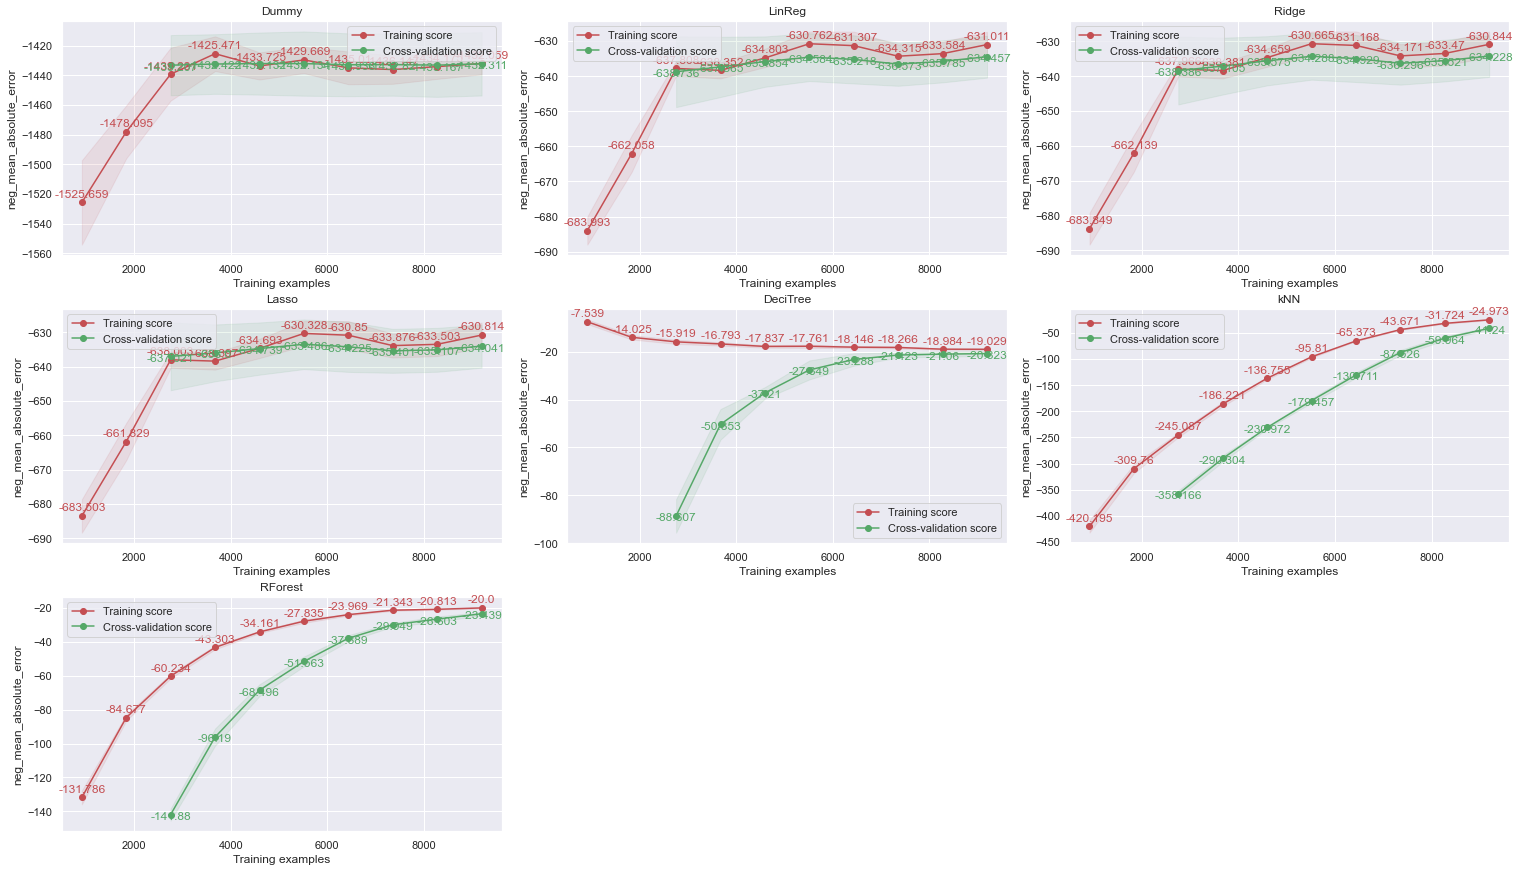

In [1176]:
lc = model_selection(models, preprocessor_pipe, X_train, y_train, lc_kwargs=lc_kwargs)

<h4>CV Results:</h4>
Dummy perforemd the worse, as expected, converging to a mean-abs-error of aroun $1400
<br>
LinReg, Ridge and Lasso all performed about the same, scoring around a mean-abs-error of $635. Their curves suggest that the models are underfitted as their converged errors are quite large with large standard deviations.
<br>
Rforest Regressor, DeciTree and kNN all performed relatively well, converging to a mean-absolute-error of $40 or less with small standard deviations. The curves also showcase that the models are not under or overfitting the data.
<br>
kNN performs the best out of the models, converging to $20 mean absolute error.

In [1305]:
selected_models = {
    'Dummy': DummyRegressor(),
    'DeciTree': DecisionTreeRegressor(random_state=39),
    "kNN": KNeighborsRegressor(),
    "RForest": RandomForestRegressor(random_state=39),
}

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

mae_scorer = make_scorer(mean_absolute_error)

In [1306]:
scores = {}

for name, model in selected_models.items():
    pipe = clone(preprocessor_pipe)
    pipe.steps.append((name, model))
    pipe.fit(X_train, y_train)

    scores[name] = mae_scorer(pipe, X_test, y_test)

In [1307]:
for name, score in scores.items():
    print(f'{name}: MAE = {score}')

Dummy: MAE = 1423.838838972883
DeciTree: MAE = 17.08172771149828
kNN: MAE = 18.89990070809402
RForest: MAE = 17.627977903076165


DeciTree had the lowest MAE, hence it is selected as the next model for further tunig

In [1272]:
pipe = clone(preprocessor_pipe)
pipe.steps.append(('DeciTree',  DecisionTreeRegressor(random_state=39)))
pipe.fit(X_train, y_train)

feat_importance(pipe[-1])

RAM (GB)                         5.933824e-01
Weight (kg)                      8.747712e-02
Type_Notebook                    5.346571e-02
SSD (GB)                         3.746983e-02
Screen Size                      2.380861e-02
CPU_7                            2.153445e-02
GPU_5                            1.913772e-02
Resolution                       1.864580e-02
CPU_4                            1.693885e-02
GPU_4                            1.630294e-02
CPU_6                            1.457611e-02
Type_Workstation                 1.404512e-02
GPU_2                            1.023901e-02
GPU_0                            7.399808e-03
Operating System_Windows 7       6.841525e-03
GPU_1                            6.767901e-03
Brand_Asus                       6.410687e-03
CPU_0                            6.219265e-03
Brand_Lenovo                     6.091587e-03
Brand_Other                      4.056862e-03
touchscreen                      3.866436e-03
Brand_HP                         3

# Model Improvement

### Feature transformations

Earlier, when transforming the CPU and GPU columns, they were feature hashed due to the large cardinality of over 100 and the complex structure making it hard to extract groups of keywords while maintaining the diversity found in the feature. However, if we are willing to lose the diversity of these features, we can simply extract the first word from these columns which represents the brand of the component. This will shrink down the dimension into only a handful of unique values. This might potentially improve performance by reudcing the number of total features in the dataset

#### CPU

In [1206]:
cpu = df['CPU'].copy()
cpu.value_counts()

Intel Core i5 7200U 2.5GHz     2240
Intel Core i7 7700HQ 2.8GHz    1732
Intel Core i7 7500U 2.7GHz     1604
Intel Core i7 8550U 1.8GHz      836
Intel Core i5 8250U 1.6GHz      820
                               ... 
Intel Core i5 2.0GHz              8
Intel Core i7 2.9GHz              8
AMD E-Series E2-6110 1.5GHz       8
Intel Core i7 2.7GHz              8
Intel Atom x5-Z8300 1.44GHz       8
Name: CPU, Length: 118, dtype: int64

In [1207]:
# with pd.option_context('display.max_rows', 200):
print(cpu.value_counts(normalize=True))

Intel Core i5 7200U 2.5GHz     0.146214
Intel Core i7 7700HQ 2.8GHz    0.113055
Intel Core i7 7500U 2.7GHz     0.104700
Intel Core i7 8550U 1.8GHz     0.054569
Intel Core i5 8250U 1.6GHz     0.053525
                                 ...   
Intel Core i5 2.0GHz           0.000522
Intel Core i7 2.9GHz           0.000522
AMD E-Series E2-6110 1.5GHz    0.000522
Intel Core i7 2.7GHz           0.000522
Intel Atom x5-Z8300 1.44GHz    0.000522
Name: CPU, Length: 118, dtype: float64


In [1208]:
split = cpu.str.split(
    r"((\d+[.]\d+[G][H][z])|(\d+[G][H][z]))", expand=True
)  # regex syntax https://regexr.com/6nfd0

cpu_speed = split[1]
cpu = split[0].str.split(' ', expand=True)[0]
cpu.name = 'CPU Brand'

In [1209]:
cpu.value_counts(normalize=False)

Intel      14588
AMD          720
Samsung       12
Name: CPU Brand, dtype: int64

#### GPU

In [1210]:
gpu = df['GPU'].copy()

#with pd.option_context('display.max_rows', 200):
print(gpu.value_counts(normalize=True))

Intel HD Graphics 620      0.216710
Intel HD Graphics 520      0.143342
Nvidia GeForce GTX 1050    0.050914
Intel UHD Graphics 620     0.050653
Nvidia GeForce GTX 1060    0.037337
                             ...   
ARM Mali T860 MP4          0.000783
AMD Radeon Pro 560         0.000522
AMD Radeon Pro 555         0.000522
Intel Iris Pro Graphics    0.000522
AMD Radeon Pro 455         0.000522
Name: GPU, Length: 110, dtype: float64


In [1211]:
gpu.head()

0    Intel Iris Plus Graphics 640
1          Intel HD Graphics 6000
2           Intel HD Graphics 620
3              AMD Radeon Pro 455
4    Intel Iris Plus Graphics 650
Name: GPU, dtype: object

In [1212]:
gpu = gpu.str.split(' ', expand=True)[0]
gpu.name = 'GPU Brand'

gpu.value_counts()

Intel     8488
Nvidia    4736
AMD       2084
ARM         12
Name: GPU Brand, dtype: int64

### Testing

In [1237]:
test_cols  = [
    brand,
    df["Type"],
    df["Screen Size"],
    df["Operating System"],
    screen_resolution,
    screen_specs,
    hard_disk,
    cpu,
    gpu,
    ram,
    weight,
    df["Price ($)"],
]

df_test = pd.concat(test_cols, axis=1)
df_test.head()

,Brand,Type,Screen Size,Operating System,Resolution,ips,touchscreen,SSD (GB),HDD (GB),Flash (GB),Hybrid (GB),CPU Brand,GPU Brand,RAM (GB),Weight (kg),Price ($)
0,Other,Ultrabook,13.3,macOS,2560x1600,1,0,128,0,0,0,Intel,Intel,8,1.37,3568.93416
1,Other,Ultrabook,13.3,macOS,1440x900,0,0,0,0,128,0,Intel,Intel,8,1.34,2394.77616
2,HP,Notebook,15.6,No OS,1920x1080,0,0,256,0,0,0,Intel,Intel,8,1.86,1531.80000
3,Other,Ultrabook,15.4,macOS,2880x1800,1,0,512,0,0,0,Intel,AMD,16,1.83,6759.76680
4,Other,Ultrabook,13.3,macOS,2560x1600,1,0,256,0,0,0,Intel,Intel,8,1.37,4804.79040


In [1251]:
X = df_test.copy().drop('Price ($)', axis=1)
y = df_test['Price ($)']

In [1263]:
tX_train, tX_test, ty_train, ty_test = train_test_split(X, y, random_state=39)

In [1264]:
numeric_features = [
    "SSD (GB)",
    "HDD (GB)",
    "Flash (GB)",
    "Hybrid (GB)",
    "RAM (GB)",
    "Weight (kg)",
    "Screen Size",
]
stdScaler_ct = make_column_transformer(
    (StandardScaler(), numeric_features),
    remainder="passthrough",
    verbose_feature_names_out=False,
)

asc_resolution = X["Resolution"].sort_values().value_counts().index
encoder_ct = make_column_transformer(
    (OrdinalEncoder(categories=[asc_resolution]), ["Resolution"]),
    (
        OneHotEncoder(drop="first"),
        ["Brand", "Type", "Operating System", "CPU Brand", "GPU Brand"],
    ),
    remainder="passthrough",
    verbose_feature_names_out=False,
)

In [1265]:
test_preprocessor = Pipeline(steps=[
    ('Scaling', DF_Transformer(stdScaler_ct)),
    ('Encoding', DF_Transformer(encoder_ct)),
])

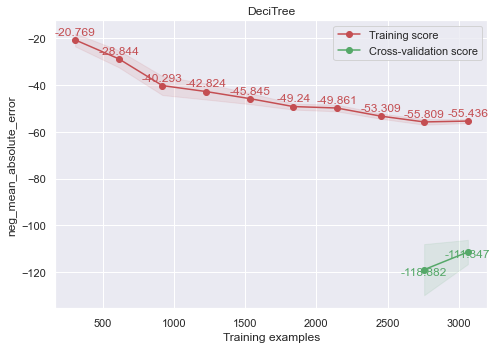

In [1269]:
test_pipe = clone(test_preprocessor)
test_pipe.steps.append(('DeciTree',  DecisionTreeRegressor(random_state=39)))

test_pipe.fit(tX_train, ty_train)

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
plot_learning_curve(
    test_pipe,
    'DeciTree',
    tX_test,
    ty_test,
    axes=ax,
    **lc_kwargs,
)

In [1324]:
mae_scorer(test_pipe, tX_test, ty_test)

68.07623173404903

Model performs way worse after replacing the feature hashed CPU and GPU with smply extracting the brands.
<br>
Hence, the intial preprocessing is superior and should be used for the final model

## Hyper Parameter Tuning

In [1275]:
pipe[-1].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 39,
 'splitter': 'best'}

In [1279]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [1283]:
param_dist = {
    'DeciTree__ccp_alpha': [0, 0.1, 0.001, 0.0001],
    'DeciTree__criterion': ['squared_error', 'absolute_error', 'poisson'],
    'DeciTree__max_depth': [1, 10, 50, 100, 500, 1000, None],
    'DeciTree__max_features' : ('log2', None, 'sqrt'),
    'DeciTree__max_leaf_nodes': [2, 10, 50, 100, 500, 1000, None],
    'DeciTree__min_impurity_decrease': [0.1, 0.01, 0.001, 0.3, 0.0],
    'DeciTree__min_samples_leaf': [0.1, 0.01, 0.001, 2, 20, 70, 100, 1],
    'DeciTree__min_samples_split': [0.1, 0.01, 0.001, 2, 20, 70, 100, 2],
    'DeciTree__min_weight_fraction_leaf' : [0.1, 0.01, 0.001, 0.0001, 0.3, 0],
    'DeciTree__splitter': ['best', 'random']
}

rsearc_kwargs = {
    "cv": 10,
    "random_state": 39,
    "n_jobs": 4,
    'n_iter': 200,
    'scoring': mae_scorer
}

rand_search = RandomizedSearchCV(clone(pipe), param_dist, **rsearc_kwargs)

In [1284]:
rand_search.fit(X_train, y_train)

rand_search.best_params_

{'DeciTree__splitter': 'best',
 'DeciTree__min_weight_fraction_leaf': 0.3,
 'DeciTree__min_samples_split': 0.001,
 'DeciTree__min_samples_leaf': 0.001,
 'DeciTree__min_impurity_decrease': 0.1,
 'DeciTree__max_leaf_nodes': 10,
 'DeciTree__max_features': 'log2',
 'DeciTree__max_depth': 10,
 'DeciTree__criterion': 'squared_error',
 'DeciTree__ccp_alpha': 0.001}

In [1303]:
mae_scorer(rand_search.best_estimator_, X_test, y_test)

1412.6218441396213

Score after randomsearch is way worse than the default parameters, the default parameters might alreedy be good.
Besides, the performance of the base model is already extremely good, with an MAE of $17.08

# Final Score

In [1304]:
pipe = clone(preprocessor_pipe)
pipe.steps.append(("Final Model", DecisionTreeRegressor(random_state=39)))
pipe.fit(X_train, y_train)

print('Final Score:')
print(f'MAE: {mae_scorer(pipe, X_test, y_test)}')

Final Score:
MAE: 17.08172771149828
